<a href="https://colab.research.google.com/github/nicolas-sacco/RCIF-Growth-Investment-Portfolio/blob/main/RCIF_Growth_Investment_Portfolio_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RCIF Growth Investment Portfolio**


##Objective: Assess Key performance and risk indicators (**KPI & KRI**) for a Value Investing Portfolio; quantifying the "growth" of a company with its financial growth vectors and profitabilty metrics


##Steps:

1. Get Data for High Market Capitalization Equities in the Retail, Electronic Technology and Finance Sectors. Equities sourced from TSX and NYSE
2.Clean, normalize, and store data of the equities in a pandas dataframe

3. Identify 5-Year Dividend CAGR and Current EPS
4. Develop Algorithm: Filter for **25% 5-year Dividend CAGR** and **EPS>4.0**
5. Assess KRI's and KPI's of Portfolio: Weigh Beta and Visualize Total and Annualized Return of Portfolio in comparisson to chosen market benchmark; SPY  







                  


### **Explanation of Growth Investing**

Investment strategy that focuses on selecting equities expected to grow at an above-average rate compared to other companies or the market as a whole. For "growth stocks" , we seek out companies that demonstrate strong potential for future growth in earnings, revenues, and other key financial metrics, often driven by innovative products/services or expanding markets. This strategy involves a long-term perspective, as it may take time for a company's growth potential to be fully realized and reflected in its stock price, thus why we are using 2019-2024 timeframe. However, growth investing can also entail higher risk compared to other investment strategies, as growth stocks are more susceptible to market fluctuations. To minimize risk of our portfolio we are going to use the quantitative **KRI: Beta β** to minimze portfolio drawdowns and overall risk by efficiently weighting our beta relative to the Standard & Poors 500 Index Fund.


### *** *KRI*:** **Beta(β)**- A measure of volatility in an equity relative to to the volatilty of the overall market


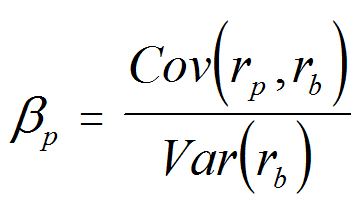

### ***KPI*: Annualized Total Return-**Average amount of capital gains realized by an investment each year over a given time period

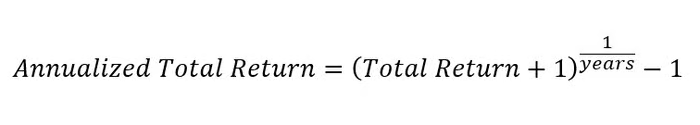

**Sectors Analyzed:**

1.Retail ( TSX & NYSE)  

2.Electronic Technology (NYSE)

3.Finance ( TSX & NYSE)


Import neccesary py libraries

In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

# **Data Collection**

## Sector: **Retail**



Collect Dividend data for High Market-Capitalization Retail Service Tickers


In [ ]:


retail_services_tickers = ['M', 'HD', 'ATD.TO', 'TGT', 'WMT', 'DOL.TO', 'ATZ.TO', 'TJX', 'KSS', 'CVS', 'ROST', 'CTC-A.TO', 'FL', 'JWN']

# Create an empty DataFrame to store the data
dividend_data = pd.DataFrame(columns=['Ticker', 'Year', 'Dividends', 'Trailing EPS', 'Stock Exchange'])

# Iterate through each ticker and fetch dividend data for the last quarter of each year from 2015 to 2023
for ticker in retail_services_tickers:
    try:
        for year in range(2015, 2024):
            # Fetch data from Yahoo Finance
            stock = yf.Ticker(ticker)

            # Get dividends for the last quarter of the specified year
            dividend_info = stock.dividends
            stock_exchange = stock.info['exchange']
            year_dividends = dividend_info[(dividend_info.index.year == year) & (dividend_info.index.quarter == 4)].sum()

            # Get trailing EPS
            trailing_eps = stock.info.get('trailingEps')

            # Append data to the DataFrame
            dividend_data = pd.concat([dividend_data, pd.DataFrame({
                'Ticker': [ticker],
                'Year': [year],
                'Dividends': [year_dividends],
                'Trailing EPS': [trailing_eps],
                'Stock Exchange': [stock_exchange]
            })], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Display the updated DataFrame with dividends for the last quarter of each year and trailing EPS
dividend_data.head(20)


,Ticker,Year,Dividends,Trailing EPS,Stock Exchange
0,M,2015,0.360,2.45,NYQ
1,M,2016,0.378,2.45,NYQ
2,M,2017,0.378,2.45,NYQ
3,M,2018,0.378,2.45,NYQ
4,M,2019,0.378,2.45,NYQ
5,M,2020,0.000,2.45,NYQ
6,M,2021,0.150,2.45,NYQ
7,M,2022,0.158,2.45,NYQ
8,M,2023,0.165,2.45,NYQ
9,HD,2015,0.590,15.62,NYQ


### Plot Histroical Dividends and Current EPS for Retail Service Tickers


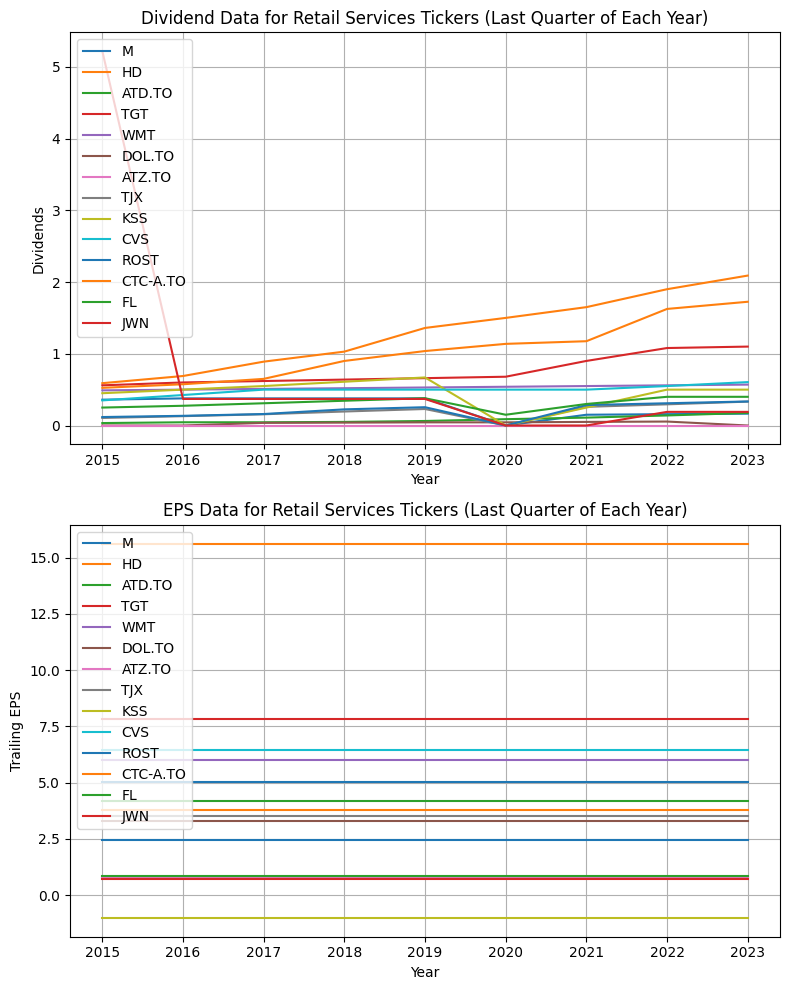

In [ ]:
# Create a figure and axis objects for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot Dividends
for ticker in dividend_data['Ticker'].unique():
    ticker_data = dividend_data[dividend_data['Ticker'] == ticker]
    ax1.plot(ticker_data['Year'], ticker_data['Dividends'], label=ticker)

ax1.set_title('Dividend Data for Retail Services Tickers (Last Quarter of Each Year)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Dividends')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot EPS
for ticker in dividend_data['Ticker'].unique():
    ticker_data = dividend_data[dividend_data['Ticker'] == ticker]
    ax2.plot(ticker_data['Year'], ticker_data['Trailing EPS'], label=ticker)

ax2.set_title('EPS Data for Retail Services Tickers (Last Quarter of Each Year)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Trailing EPS')
ax2.legend(loc='upper left')
ax2.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()



## 5-Year Dividend Compounded Annual Growth Rate (CAGR) for Retail Services


In [ ]:
# Calculate 5-Year Dividend CAGR
dividend_cagr_data = []

for ticker in retail_services_tickers:
    try:
        # Filter dividend data for the ticker
        ticker_dividends = dividend_data[dividend_data['Ticker'] == ticker]

        # Calculate CAGR
        if len(ticker_dividends) >= 5:  # Only calculate if data is available for at least 5 years
            dividends_values = ticker_dividends['Dividends'].values
            cagr = (((dividends_values[-1] / dividends_values[0]) ** (1/5)) - 1) * 100  # Convert to percentage
            dividend_cagr_data.append({
                'Ticker': ticker,
                '5-Year Dividend CAGR': cagr
            })
    except Exception as e:
        print(f"Error calculating 5-Year Dividend CAGR for {ticker}: {e}")

# Create DataFrame from list
dividend_cagr_df = pd.DataFrame(dividend_cagr_data)

# Format the '5-Year Dividend CAGR' column as percentage
dividend_cagr_df['5-Year Dividend CAGR'] = dividend_cagr_df['5-Year Dividend CAGR']



dividend_cagr_df = dividend_cagr_df[~dividend_cagr_df['Ticker'].isin(['DOL.TO', 'ATZ.TO'])]



dividend_cagr_df



<ipython-input-4-6d9ebed04204>:12: RuntimeWarning: invalid value encountered in scalar divide
  cagr = (((dividends_values[-1] / dividends_values[0]) ** (1/5)) - 1) * 100  # Convert to percentage


,Ticker,5-Year Dividend CAGR
0,M,-14.446794
1,HD,28.783094
2,ATD.TO,38.775189
3,TGT,14.456624
4,WMT,3.070826
7,TJX,25.965318
8,KSS,2.129569
9,CVS,11.567440
10,ROST,23.206199
11,CTC-A.TO,26.860366


## Plot Dividend CAGR for Retail Services

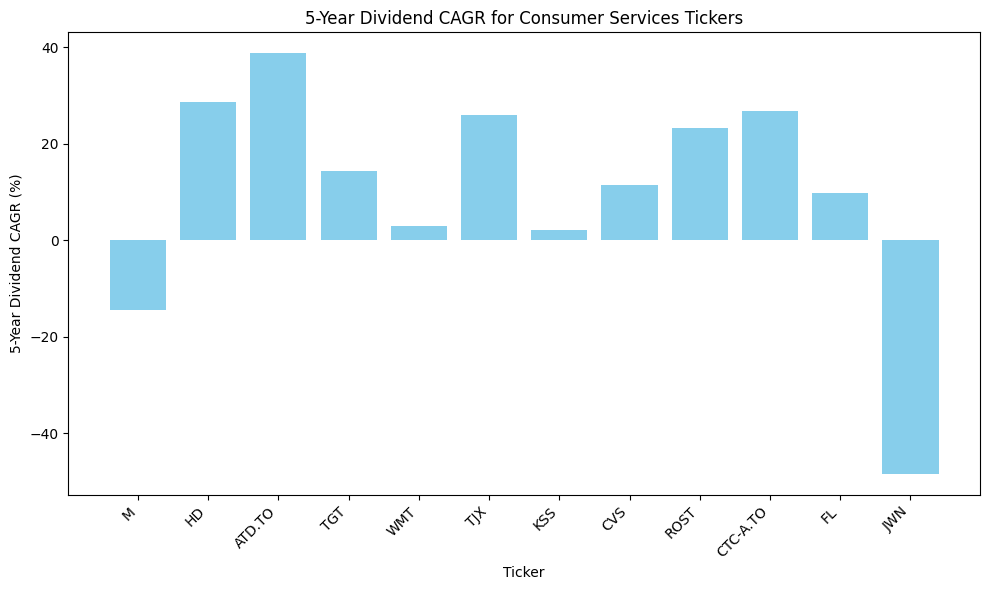

In [ ]:

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(dividend_cagr_df['Ticker'], dividend_cagr_df['5-Year Dividend CAGR'], color='skyblue')

# Adding labels and title
plt.xlabel('Ticker')
plt.ylabel('5-Year Dividend CAGR (%)')
plt.title('5-Year Dividend CAGR for Consumer Services Tickers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



##Sector: **Electronic Technology**

### Collect Dividend data for High Market-Capitalization Electronic Technology Tickers

In [ ]:

# Electronic Technology

tech_tickers = ["AAPL", "AVGO", "INTC", "QCOM", "TXN", "MSFT", "NVDA", "TSM", "SONY"]

# Create an empty DataFrame to store the data
dividend_data_tech = pd.DataFrame(columns=['Ticker', 'Year', 'Dividends', 'Trailing EPS', 'Stock Exchange'])

# Iterate through each ticker and fetch dividend data for the last quarter of each year from 2015 to 2023
for ticker in tech_tickers:
    try:
        for year in range(2015, 2024):
            # Fetch data from Yahoo Finance
            stock = yf.Ticker(ticker)

            # Get dividends for the last quarter of the specified year
            dividend_info = stock.dividends
            stock_exchange = stock.info['exchange']
            year_dividends = dividend_info[(dividend_info.index.year == year) & (dividend_info.index.quarter == 4)].sum()

            # Get trailing EPS
            trailing_eps = stock.info.get('trailingEps')

            # Append data to the DataFrame
            dividend_data_tech = pd.concat([dividend_data_tech, pd.DataFrame({
                'Ticker': [ticker],
                'Year': [year],
                'Dividends': [year_dividends],
                'Trailing EPS': [trailing_eps],
                'Stock Exchange': [stock_exchange]
            })], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Display the updated DataFrame with dividends for the last quarter of each year and trailing EPS
dividend_data_tech.head(20)


,Ticker,Year,Dividends,Trailing EPS,Stock Exchange
0,AAPL,2015,0.1300,6.44,NMS
1,AAPL,2016,0.1425,6.44,NMS
2,AAPL,2017,0.1575,6.44,NMS
3,AAPL,2018,0.1825,6.44,NMS
4,AAPL,2019,0.1925,6.44,NMS
5,AAPL,2020,0.2050,6.44,NMS
6,AAPL,2021,0.2200,6.44,NMS
7,AAPL,2022,0.2300,6.44,NMS
8,AAPL,2023,0.2400,6.44,NMS
9,AVGO,2015,0.4400,32.99,NMS


### Plot Historical Dividend and Current EPS for Electronic Technology Tickers

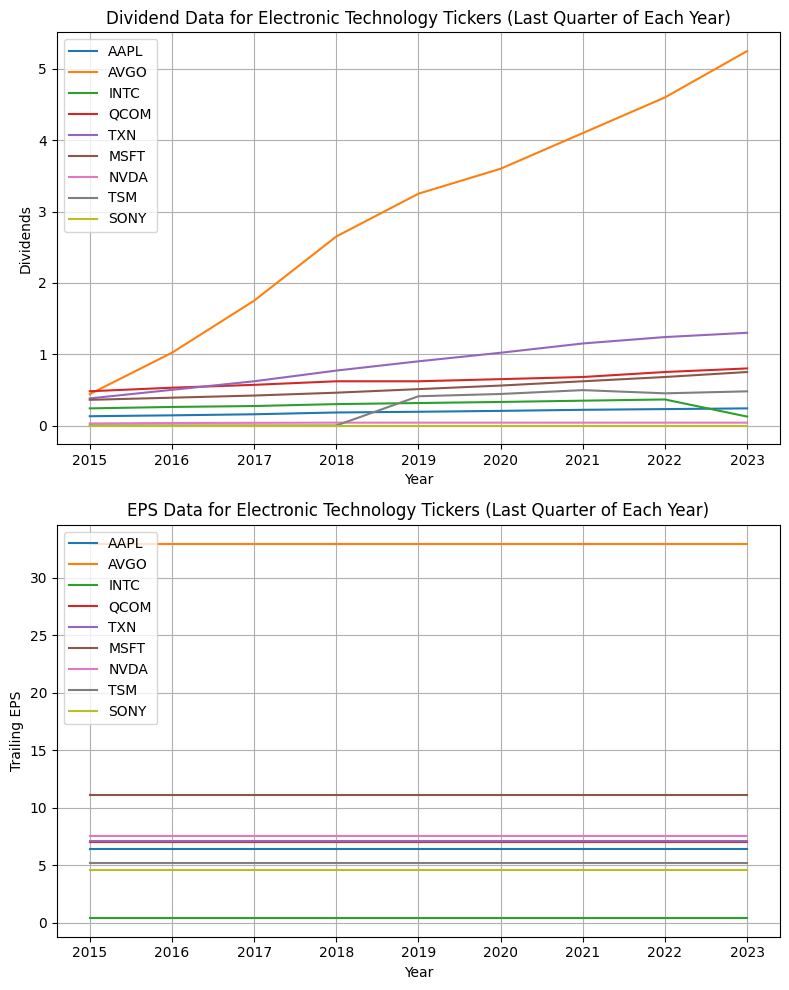

In [ ]:
# Create a figure and axis objects for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot Dividends
for ticker in dividend_data_tech['Ticker'].unique():
    ticker_data = dividend_data_tech[dividend_data_tech['Ticker'] == ticker]
    ax1.plot(ticker_data['Year'], ticker_data['Dividends'], label=ticker)

ax1.set_title('Dividend Data for Electronic Technology Tickers (Last Quarter of Each Year)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Dividends')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot EPS
for ticker in dividend_data_tech['Ticker'].unique():
    ticker_data = dividend_data_tech[dividend_data_tech['Ticker'] == ticker]
    ax2.plot(ticker_data['Year'], ticker_data['Trailing EPS'], label=ticker)

ax2.set_title('EPS Data for Electronic Technology Tickers (Last Quarter of Each Year)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Trailing EPS')
ax2.legend(loc='upper left')
ax2.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


## Dividend Compounded Annual Growth Rate for Electronic Technology Tickers

In [ ]:
# Calculate 5-Year Dividend CAGR
dividend_cagr_data_tech = []

for ticker in tech_tickers:
    try:
        # Filter dividend data for the ticker
        ticker_dividends = dividend_data_tech[dividend_data_tech['Ticker'] == ticker]

        # Calculate CAGR
        if len(ticker_dividends) >= 5:  # Only calculate if data is available for at least 5 years
            dividends_values = ticker_dividends['Dividends'].values
            cagr = (((dividends_values[-1] / dividends_values[0]) ** (1/5)) - 1) * 100  # Convert to percentage
            dividend_cagr_data_tech.append({
                'Ticker': ticker,
                '5-Year Dividend CAGR': cagr
            })
    except Exception as e:
        print(f"Error calculating 5-Year Dividend CAGR for {ticker}: {e}")

# Create DataFrame from list
dividend_cagr_df_tech = pd.DataFrame(dividend_cagr_data_tech)

# Format the '5-Year Dividend CAGR' column as percentage
dividend_cagr_df_tech['5-Year Dividend CAGR'] = dividend_cagr_df_tech['5-Year Dividend CAGR']

dividend_cagr_df_tech = dividend_cagr_df_tech[~dividend_cagr_df_tech['Ticker'].isin(['TSM', 'SONY'])]

# Display the updated DataFrame with dividends for the last quarter of each year and trailing EPS
dividend_cagr_df_tech

<ipython-input-8-41d664c149e3>:12: RuntimeWarning: divide by zero encountered in scalar divide
  cagr = (((dividends_values[-1] / dividends_values[0]) ** (1/5)) - 1) * 100  # Convert to percentage
<ipython-input-8-41d664c149e3>:12: RuntimeWarning: invalid value encountered in scalar divide
  cagr = (((dividends_values[-1] / dividends_values[0]) ** (1/5)) - 1) * 100  # Convert to percentage


,Ticker,5-Year Dividend CAGR
0,AAPL,13.045578
1,AVGO,64.187967
2,INTC,-12.231282
3,QCOM,10.756634
4,TXN,27.888635
5,MSFT,15.811518
6,NVDA,6.827835


## Plot Dividend CAGR

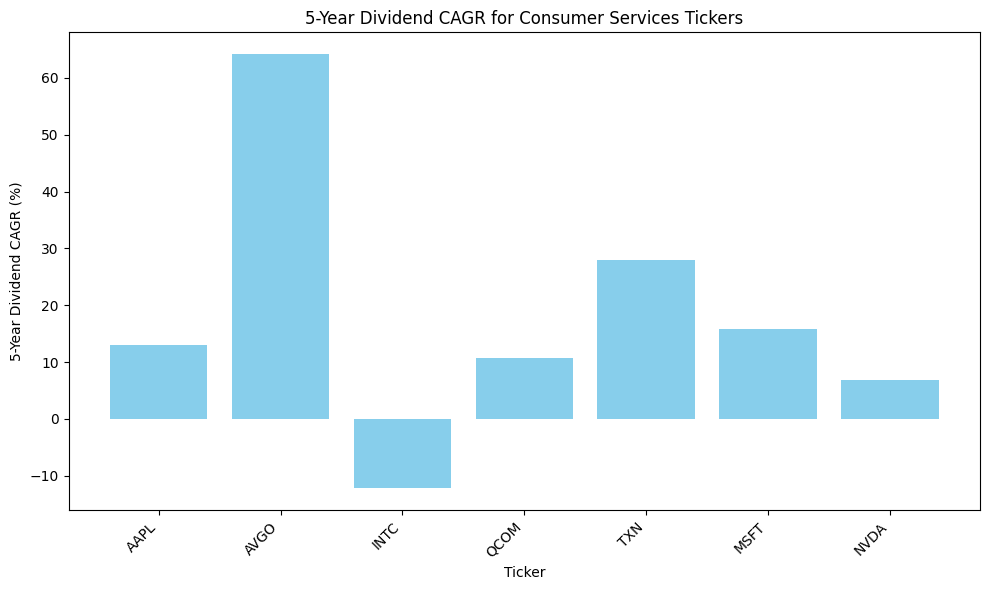

In [ ]:

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(dividend_cagr_df_tech['Ticker'], dividend_cagr_df_tech['5-Year Dividend CAGR'], color='skyblue')

# Adding labels and title
plt.xlabel('Ticker')
plt.ylabel('5-Year Dividend CAGR (%)')
plt.title('5-Year Dividend CAGR for Consumer Services Tickers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# **Sector: Finance**

### Collect Dividend data for High Market-Capitalization Finance Tickers

In [ ]:

# Financial Services

fin_tickers = ["JPM", "GS", "BAC", "BLK", "TD", "BMO", "TD", "RY", "WFC","C","BX"]

# Create an empty DataFrame to store the data
dividend_data_fin = pd.DataFrame(columns=['Ticker', 'Year', 'Dividends', 'Trailing EPS', 'Stock Exchange'])

# Iterate through each ticker and fetch dividend data for the last quarter of each year from 2015 to 2023
for ticker in fin_tickers:
    try:
        for year in range(2015, 2024):
            # Fetch data from Yahoo Finance
            stock = yf.Ticker(ticker)

            # Get dividends for the last quarter of the specified year
            dividend_info = stock.dividends
            stock_exchange = stock.info['exchange']
            year_dividends = dividend_info[(dividend_info.index.year == year) & (dividend_info.index.quarter == 4)].sum()

            # Get trailing EPS
            trailing_eps = stock.info.get('trailingEps')

            # Append data to the DataFrame
            dividend_data_fin = pd.concat([dividend_data_fin, pd.DataFrame({
                'Ticker': [ticker],
                'Year': [year],
                'Dividends': [year_dividends],
                'Trailing EPS': [trailing_eps],
                'Stock Exchange': [stock_exchange]
            })], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Display the updated DataFrame with dividends for the last quarter of each year and trailing EPS
dividend_data_fin.head(20)

,Ticker,Year,Dividends,Trailing EPS,Stock Exchange
0,JPM,2015,0.440,16.24,NYQ
1,JPM,2016,0.480,16.24,NYQ
2,JPM,2017,0.560,16.24,NYQ
3,JPM,2018,0.800,16.24,NYQ
4,JPM,2019,0.900,16.24,NYQ
5,JPM,2020,0.900,16.24,NYQ
6,JPM,2021,1.000,16.24,NYQ
7,JPM,2022,1.000,16.24,NYQ
8,JPM,2023,1.050,16.24,NYQ
9,GS,2015,0.650,22.87,NYQ


### Plot Historical Dividend Data and Current EPS for Finance Tickers

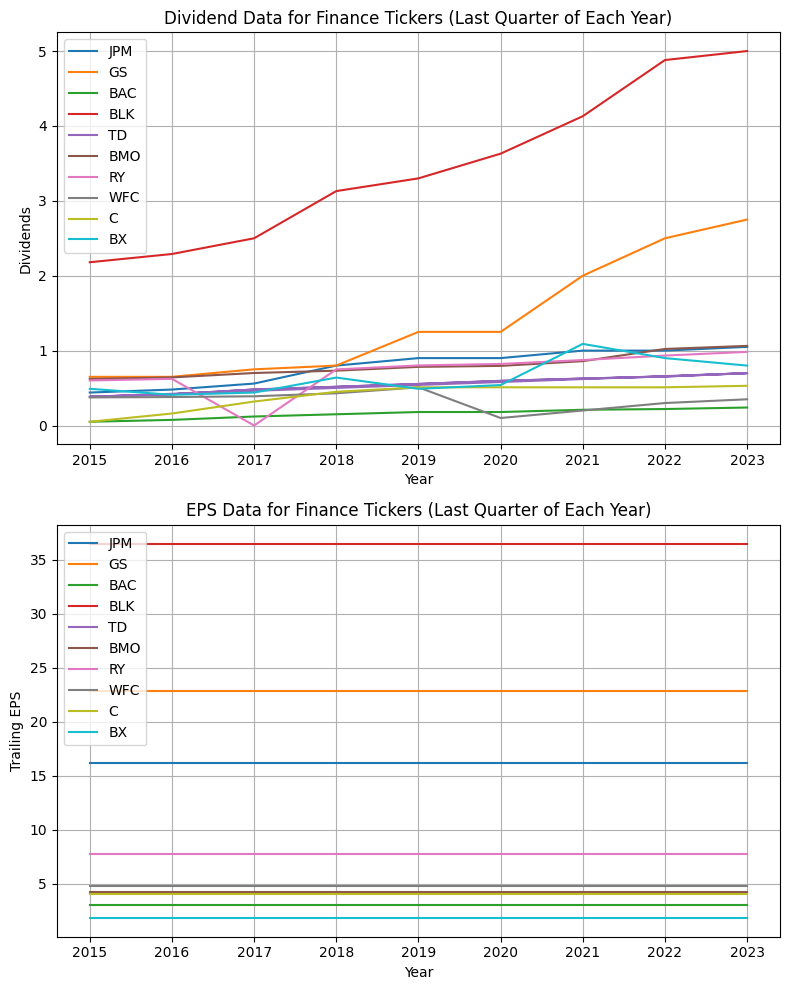

In [ ]:
# Create a figure and axis objects for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot Dividends
for ticker in dividend_data_fin['Ticker'].unique():
    ticker_data = dividend_data_fin[dividend_data_fin['Ticker'] == ticker]
    ax1.plot(ticker_data['Year'], ticker_data['Dividends'], label=ticker)

ax1.set_title('Dividend Data for Finance Tickers (Last Quarter of Each Year)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Dividends')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot EPS
for ticker in dividend_data_fin['Ticker'].unique():
    ticker_data = dividend_data_fin[dividend_data_fin['Ticker'] == ticker]
    ax2.plot(ticker_data['Year'], ticker_data['Trailing EPS'], label=ticker)

ax2.set_title('EPS Data for Finance Tickers (Last Quarter of Each Year)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Trailing EPS')
ax2.legend(loc='upper left')
ax2.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

## Dividend CAGR for Finance Tickers

In [ ]:
# Calculate 5-Year Dividend CAGR
dividend_cagr_data_fin = []

for ticker in fin_tickers:
    try:
        # Filter dividend data for the ticker
        ticker_dividends = dividend_data_fin[dividend_data_fin['Ticker'] == ticker]

        # Calculate CAGR
        if len(ticker_dividends) >= 5:  # Only calculate if data is available for at least 5 years
            dividends_values = ticker_dividends['Dividends'].values
            cagr = (((dividends_values[-1] / dividends_values[0]) ** (1/5)) - 1) * 100  # Convert to percentage
            dividend_cagr_data_fin.append({
                'Ticker': ticker,
                '5-Year Dividend CAGR': cagr
            })
    except Exception as e:
        print(f"Error calculating 5-Year Dividend CAGR for {ticker}: {e}")

# Create DataFrame from list
dividend_cagr_df_fin = pd.DataFrame(dividend_cagr_data_fin)

# Format the '5-Year Dividend CAGR' column as percentage
dividend_cagr_df_fin['5-Year Dividend CAGR'] = dividend_cagr_df_fin['5-Year Dividend CAGR']

# Display the updated DataFrame with dividends for the last quarter of each year and trailing EPS

dividend_cagr_df_fin

,Ticker,5-Year Dividend CAGR
0,JPM,19.000099
1,GS,33.439335
2,BAC,36.851086
3,BLK,18.059979
4,TD,12.727322
5,BMO,11.313689
6,TD,12.727322
7,RY,10.340719
8,WFC,-1.370381
9,C,60.347123


## Plot Dividend CAGR for Finance Tickers

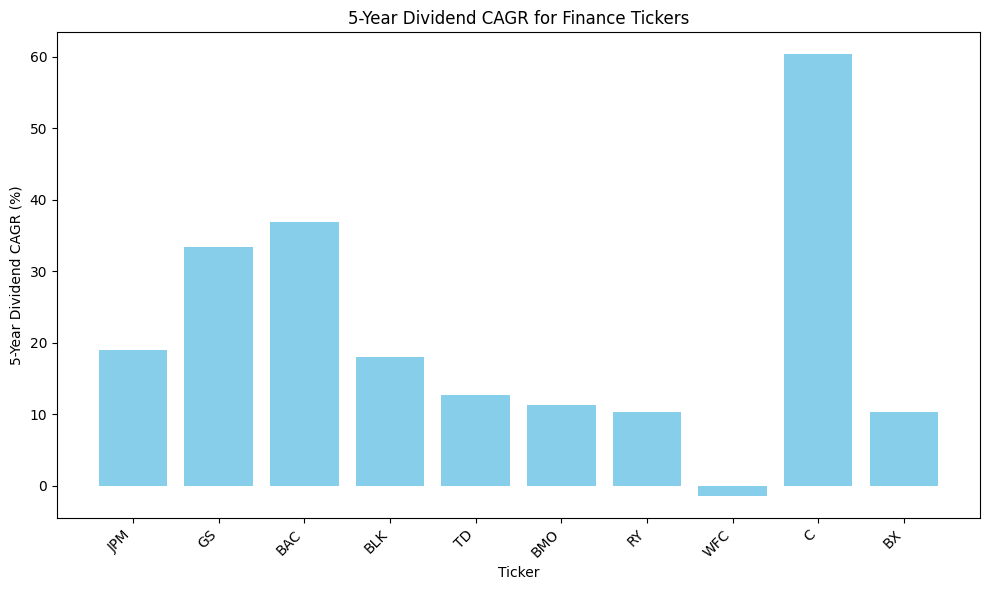

In [ ]:

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(dividend_cagr_df_fin['Ticker'], dividend_cagr_df_fin['5-Year Dividend CAGR'], color='skyblue')

# Adding labels and title
plt.xlabel('Ticker')
plt.ylabel('5-Year Dividend CAGR (%)')
plt.title('5-Year Dividend CAGR for Finance Tickers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# **Growth Portfolio Construction**

Now we are going to filter for tickers with at least **25% 5-Year Dividend CAGR** current **EPS of at least 4.0** to consider for our growth investement portfolio

Intially we are going to assign equal weight for each equity, later on in the project we will re-adjust weighting based on our KRI's (beta)

In [ ]:
# Define portfolios for retail, electronic technology, and financial sectors

portfolio_retail = dividend_cagr_df.loc[(dividend_cagr_df['5-Year Dividend CAGR'] >= 25) & (dividend_data['Trailing EPS'] > 2.0), 'Ticker']
portfolio_tech = dividend_cagr_df_tech.loc[(dividend_cagr_df_tech['5-Year Dividend CAGR'] >= 25) & (dividend_data_tech['Trailing EPS'] > 5.0), 'Ticker']
portfolio_fin = dividend_cagr_df_fin.loc[(dividend_cagr_df_fin['5-Year Dividend CAGR'] >= 25) & (dividend_data_fin['Trailing EPS'] > 5.0), 'Ticker']


# Convert the column to numeric type
dividend_cagr_df_fin['5-Year Dividend CAGR'] = pd.to_numeric(dividend_cagr_df_fin['5-Year Dividend CAGR'])

# Concatenate the portfolios along the rows
portfolio_df = pd.concat([portfolio_retail, portfolio_tech, portfolio_fin], ignore_index=True)

# Convert the Series to DataFrame with 'Ticker' as column name
portfolio_df = portfolio_df.to_frame(name='Ticker')

# Display the combined DataFrame
portfolio_df






,Ticker
0,HD
1,ATD.TO
2,TJX
3,CTC-A.TO
4,AVGO
5,TXN
6,GS
7,BAC
8,C


In [ ]:
portfolio_df['Weight']=1/9 ##equal weight for each equity
portfolio_df

,Ticker,Weight
0,HD,0.111111
1,ATD.TO,0.111111
2,TJX,0.111111
3,CTC-A.TO,0.111111
4,AVGO,0.111111
5,TXN,0.111111
6,GS,0.111111
7,BAC,0.111111
8,C,0.111111


# **Beta β**

In [ ]:
import yfinance as yf

# Initialize an empty list to store beta values
beta_values = []

# Iterate through each ticker in the portfolio_df DataFrame
for ticker in portfolio_df['Ticker']:
    try:
        # Fetch the stock data for the current ticker
        stock_data = yf.Ticker(ticker)

        # Get the beta of the stock
        stock_info = stock_data.info
        stock_beta = stock_info.get('beta')

        # Append the beta value to the list
        beta_values.append(stock_beta)
    except Exception as e:
        # If there's an error fetching the beta, append None to the list
        print(f"Error fetching beta for {ticker}: {e}")
        beta_values.append(None)

# Add the list of beta values to the portfolio_df DataFrame as a new column
portfolio_df['beta'] = beta_values

portfolio_df.set_index('Ticker', inplace=True)

# Display the updated DataFrame

portfolio_df



,Weight,beta
Ticker,,
HD,0.111111,0.981
ATD.TO,0.111111,0.872
TJX,0.111111,0.867
CTC-A.TO,0.111111,1.378
AVGO,0.111111,1.264
TXN,0.111111,1.033
GS,0.111111,1.424
BAC,0.111111,1.399
C,0.111111,1.512


## **Beta Weight for Portfolio**

In [ ]:
portfolio_beta = sum(weight * beta for weight, beta in zip(portfolio_df['Weight'], portfolio_df['beta']))

print("The Beta Weight of the Total Portfolio is:", portfolio_beta)


The Beta Weight of the Total Portfolio is: 1.192222222222222


We can see the first iteration of the portfolios beta is: 1.19; lets attempt to alter the weight so we can achieve a beta closer to 1.

We can achieve this by putting more weight of the portfolio on the Retail Service Industry as they all have beta values β less than 1. .

In [ ]:
# Update the weights for the specified tickers
portfolio_df.loc['ATD.TO', 'Weight'] = 0.17
portfolio_df.loc['HD', 'Weight'] = 0.16
portfolio_df.loc['TJX', 'Weight'] = 0.18

portfolio_df.loc['CTC-A.TO', 'Weight'] = 0.08
portfolio_df.loc['C','Weight']=0.04
portfolio_df.loc['GS','Weight']=0.07
portfolio_df.loc['BAC','Weight']=0.08
portfolio_df.loc['AVGO','Weight']=0.10
portfolio_df.loc['TXN','Weight']=0.12

print(portfolio_df['Weight'].sum())


new_portfolio_beta = sum(weight * beta for weight, beta in zip(portfolio_df['Weight'], portfolio_df['beta']))

print("The Beta Weight of the Total Portfolio is:", new_portfolio_beta)

portfolio_df


1.0
The Beta Weight of the Total Portfolio is: 1.09394


,Weight,beta
Ticker,,
HD,0.16,0.981
ATD.TO,0.17,0.872
TJX,0.18,0.867
CTC-A.TO,0.08,1.378
AVGO,0.10,1.264
TXN,0.12,1.033
GS,0.07,1.424
BAC,0.08,1.399
C,0.04,1.512


## *** *KRI *: Beta Weight of Cummulative Portfolio is β=1.09**

This beta value is acceptable to ensure our risk-adjusted portfolio does not take on excessive risk/volatilty in comparison to SPY

# **Optimal Portfolio**

Now that we have the appropriate weighting for our portfolio, lets visualize the allocation % as a pie chart

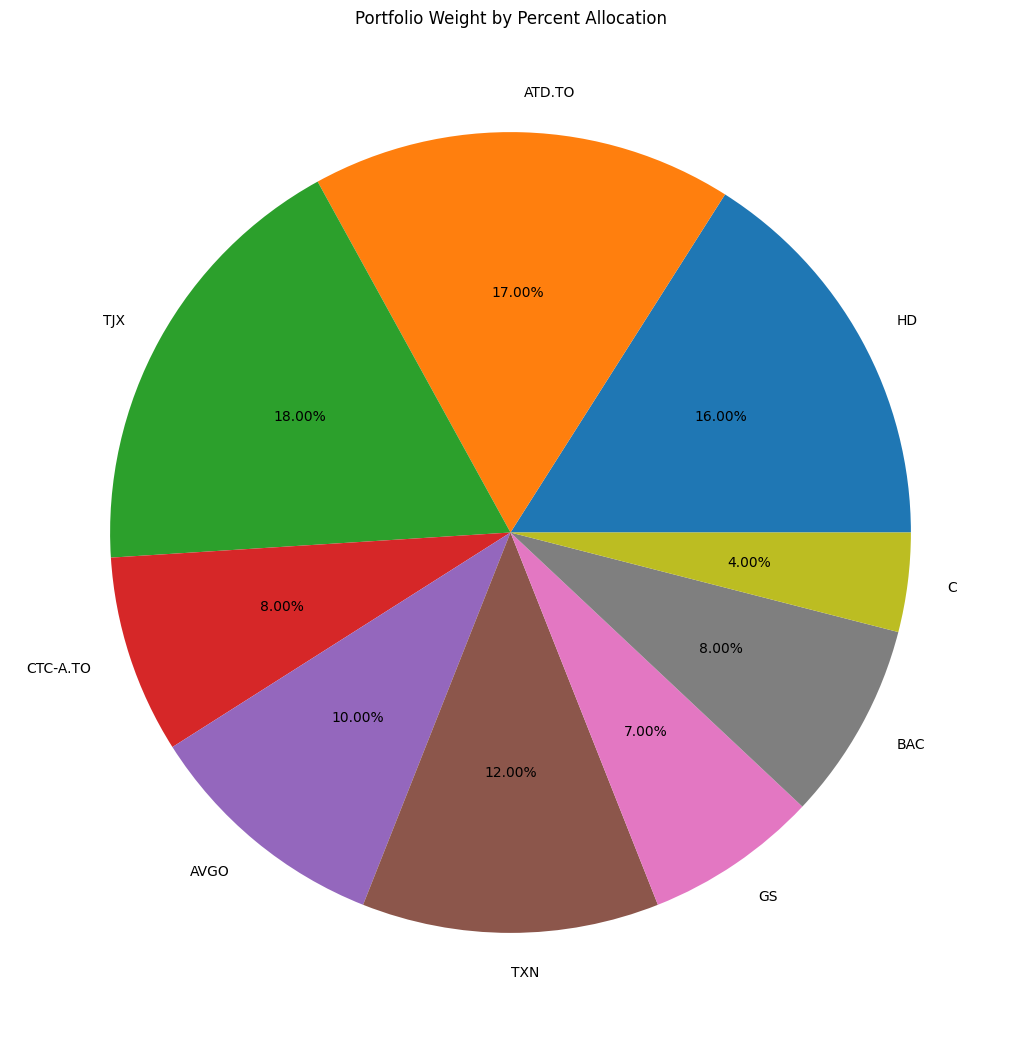

In [ ]:
plt.figure(figsize=(14, 13))
plt.pie(portfolio_df['Weight'], labels=portfolio_df.index, autopct='%.2f%%')
plt.title("Portfolio Weight by Percent Allocation")

plt.show()

# **Historical Performance of Portfolio**

Let us visualize portfolios returns historically for past 5 years (2019-2024)

In [ ]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2019, 1, 14), end=datetime(2024, 1, 14)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["HD", "ATD.TO", "TJX", "CTC-A.TO", "AVGO", "TXN", "GS", "BAC","C"] #companies selected to analyze
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data (2024)
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(1282, 9)


,HD,ATD.TO,TJX,CTC-A.TO,AVGO,TXN,GS,BAC,C
Date,,,,,,,,,
2024-01-08,347.929993,80.019997,92.504471,140.883301,1074.849976,167.220428,388.859985,34.160000,53.499382
2024-01-09,346.190002,79.620003,92.763588,140.408966,1082.489990,167.309723,383.739990,33.630001,52.974392
2024-01-10,356.799988,80.360001,93.819984,142.335892,1080.569946,165.940521,381.959991,33.599998,52.518742
2024-01-11,356.529999,79.790001,94.926208,142.494003,1099.979980,164.303452,379.750000,33.150002,51.587631
2024-01-12,355.709991,78.019997,94.706955,141.950500,1107.680054,163.579163,377.750000,32.799999,52.122524


### The pandas series of relative returns for portfolio from 2019-2024 with risk-adjusted weight for each ticker

In [ ]:
cum_portfolio_return = 0


for ticker in d.columns:

    cum_return_per_asset = ((d[ticker] - d.iloc[0][ticker]) / d.iloc[0][ticker] ) *100  # Calculating relative change

    cum_portfolio_return += cum_return_per_asset * portfolio_df.loc[ticker, 'Weight']    # Multiply the relative change by the weight of the asset

cum_portfolio_return


Date
2019-01-14      0.000000
2019-01-15      0.703946
2019-01-16      1.806075
2019-01-17      2.406331
2019-01-18      4.054756
                 ...    
2024-01-08    129.993531
2024-01-09    129.618633
2024-01-10    131.205968
2024-01-11    131.715880
2024-01-12    130.732057
Name: HD, Length: 1282, dtype: float64

### The pandas series of relative returns for SPY from 2019-2024

In [ ]:
spy = yf.download("SPY", start=datetime(2019, 1, 14), end=datetime(2024, 1, 14))
day = np.arange(1, len(spy) + 1)
spy['day'] = day
spy.drop(columns=['Adj Close', 'Volume'], inplace=True)
spy = spy[['day', 'Open', 'High', 'Low', 'Close']]
spy= spy.round(2)
spy=spy.fillna(spy['Close'].mean())
spy.head()

[*********************100%%**********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2019-01-14,1,256.86,258.30,256.41,257.40
2019-01-15,2,257.82,260.70,257.81,260.35
2019-01-16,3,260.83,261.97,260.60,260.98
2019-01-17,4,260.01,263.92,259.96,262.96
2019-01-18,5,264.98,266.98,263.00,266.46


In [ ]:
cum_spy_return = (spy['Close'] - spy.iloc[0]['Close']) / spy.iloc[0]['Close'] * 100


cum_spy_return

Date
2019-01-14     0.000000
2019-01-15     1.146076
2019-01-16     1.390831
2019-01-17     2.160062
2019-01-18     3.519814
                ...    
2024-01-08    84.382284
2024-01-09    84.102564
2024-01-10    85.143745
2024-01-11    85.062160
2024-01-12    85.190365
Name: Close, Length: 1259, dtype: float64

### Let us now visualize our growth portfolios performance vs SPY historically (2019-2024) in terms of % return

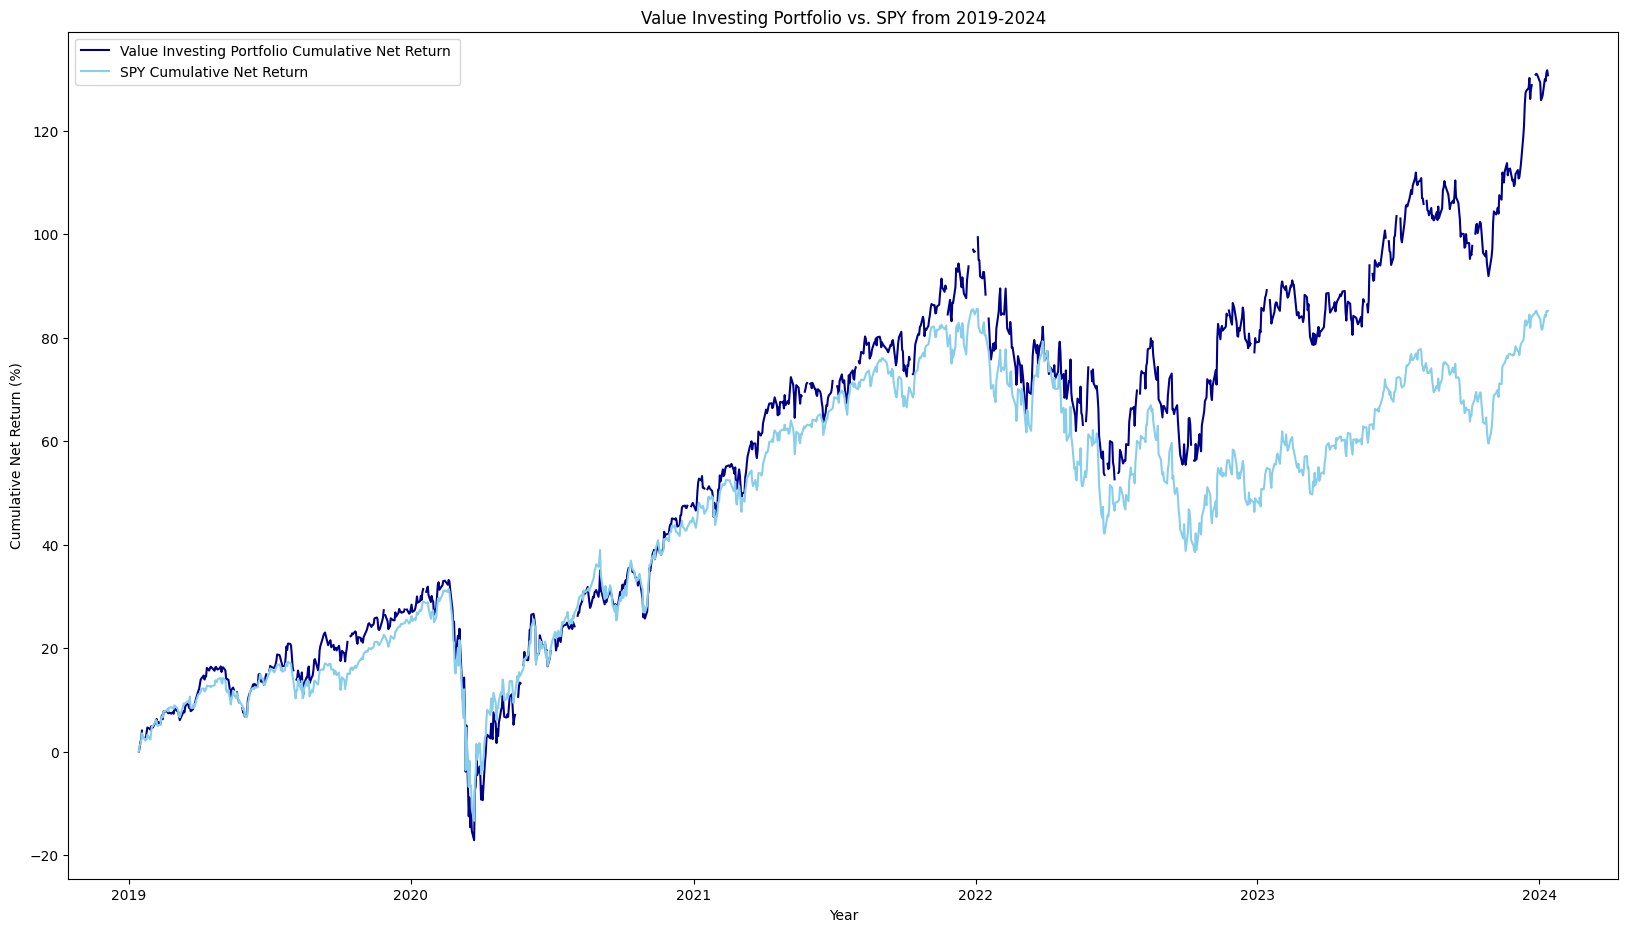

In [ ]:

plt.figure(figsize=(20, 11))

plt.plot(cum_portfolio_return.index, cum_portfolio_return, label='Value Investing Portfolio Cumulative Net Return ', color='darkblue')


plt.plot(cum_spy_return.index, cum_spy_return, label='SPY Cumulative Net Return', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Cumulative Net Return (%)')
plt.title('Value Investing Portfolio vs. SPY from 2019-2024')
plt.legend()

## **Growth Portfolio:**

###  Total Return: **130%**

###  Avg. Annualized Return: **26%**





## **Stanard & Poors 500 Index Fund:**

###  Total Return: **85%**

###  Avg. Annualized Return: **17%**

In conclusion, we can see that our portfolio generated returns that exceeded  SPY by a total net return of **45%** over the 5 year span.

On average our portfolio annual return exceeded SPY's annual return by **9%**